In [1]:
import cv2

Face Detection in Images

In [2]:
imagePath = "C:\\Users\\Hp\\Desktop\\ll.jpg"

In [3]:
img = cv2.imread(imagePath)

In [4]:
print (img)

[[[ 79  42  16]
  [137  64   0]
  [181  96  24]
  ...
  [ 62  53  49]
  [ 66  57  53]
  [ 69  60  56]]

 [[ 93  41   0]
  [170  86  10]
  [155  69   0]
  ...
  [ 61  52  48]
  [ 64  55  51]
  [ 67  58  54]]

 [[119  51   0]
  [188  93  14]
  [155  73   1]
  ...
  [ 62  54  47]
  [ 63  55  48]
  [ 64  56  49]]

 ...

 [[ 74  27   6]
  [ 73  24   2]
  [ 76  27   5]
  ...
  [114  55   5]
  [111  52   3]
  [116  53   9]]

 [[ 72  27   6]
  [ 71  24   2]
  [ 73  26   4]
  ...
  [111  52   2]
  [109  48   0]
  [113  51   5]]

 [[ 70  25   4]
  [ 69  22   0]
  [ 72  25   3]
  ...
  [111  51   0]
  [108  47   0]
  [112  50   4]]]


In [5]:
img.shape

(280, 640, 3)

In [6]:
#Convert the Image to Grayscale to improve computational efficiency
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
gray_image.shape

(280, 640)

In [8]:
#Load the Classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [9]:
# face detection on the grayscale image using the classifier we just loaded
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(20,20) # minSize =minimum size of the object to be detected
)

In [10]:
#create a bounding box around these faces
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [11]:
# convert the image from the BGR format to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

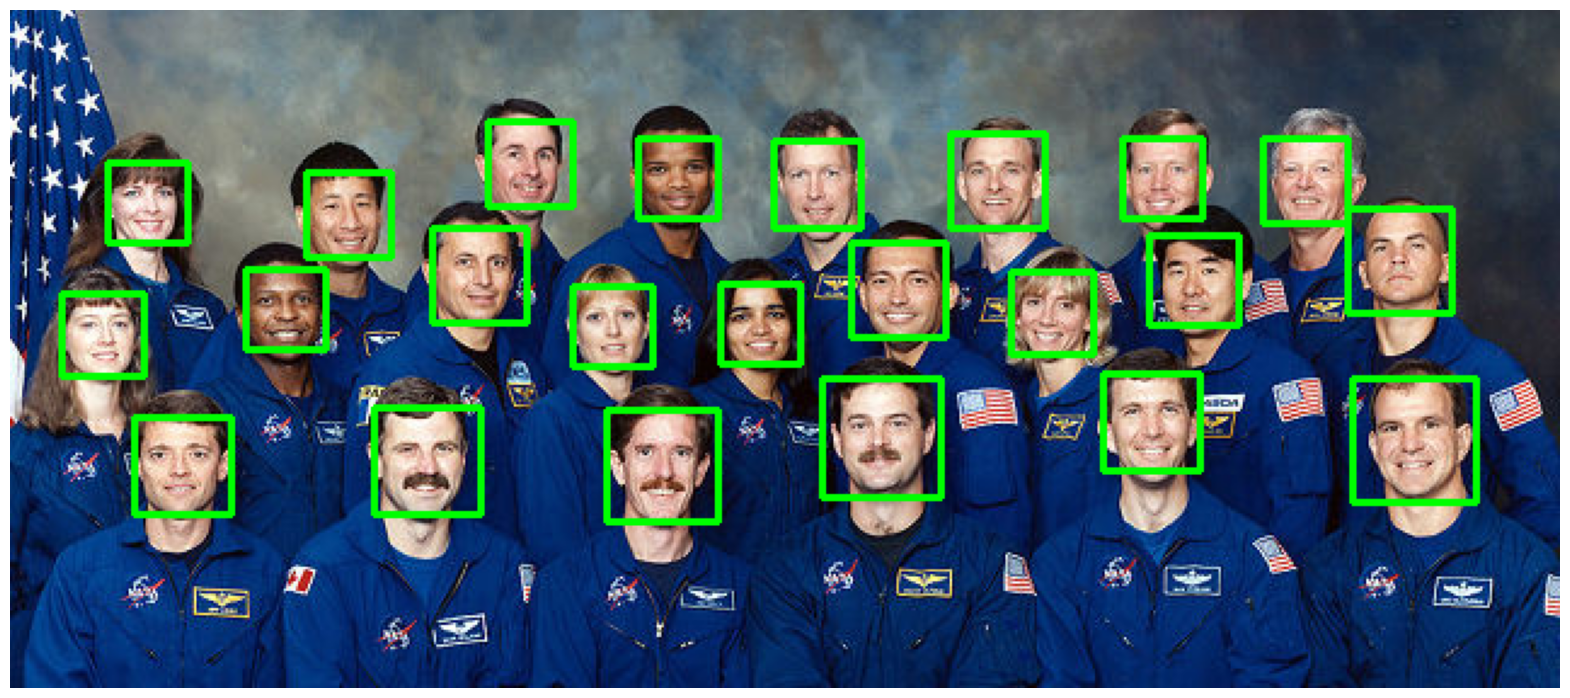

In [12]:
import matplotlib.pyplot as plt

#Display the image
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Real-Time Face Detection

In [13]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [14]:
#Access the Webcam
video_capture = cv2.VideoCapture(0)

In [15]:
#create a function to detect faces in the video stream and draw a bounding box around them
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
#Creating a Loop for Real-Time Face Detection
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()